# WeRateDogs: Wrangle and Analyze Data

<img src='images/dog-rates-social.jpg'>

**image via:** [Boston Magazine](https://www.bostonmagazine.com/arts-entertainment/2017/04/18/dog-rates-mit/)

- <a href="#import">Import Libraries</a></li>

- <a href="#gather">Gathering Data</a></li>

  - <a href="#csv">Enhanced Twitter Archive</a></li>
  
  - <a href="#tsv">Image Predictions File</a></li>
  
  - <a href="#api">Additional Data via the Twitter API</a></li>
  
- <a href="#assess">Assessing Data </a></li>

  - <a href="#assess_csv">Assess Archieved Data</a></li>
  
  - <a href="#assess_tsv">Assess Image Predictions Data</a></li>
  
  - <a href="#assess_api">Assess Tweets from Twitter API Data</a></li>
  
  - <a href="#assess_summary">Summary findings</a></li>
  
- <a href="#clean">Cleaning Data</a></li>

- <a href="#store">Storing Data</a></li>

- <a href="#Visual">Analyzing and Visualizing Data</a></li>

<a id='import'></a>
<hr>

## Import Libraries

In [248]:
#prerequisite package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import requests
import os
import json
pd.options.mode.chained_assignment = None
import seaborn as sb
from tweepy import OAuthHandler
from timeit import default_timer as timer
from IPython.display import Image
import datetime
%matplotlib inline

<a id='gather'></a>
<hr>

## Gathering Data

This project gathered data from three different resources:
- Enhanced Twitter Archive ( manually downloadable file as `twitter_archive_enhanced.csv` )

- Image Predictions File ( hosted on Udacity's servers with the following URL: [imagepredictions](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) )

- Additional Data via the Twitter API ( queriable using tweets' IDs in the [WeRateDogs](https://twitter.com/dog_rates) Twitter account )



<a id='csv'></a>
### `Enhanced Twitter Archive`

In [249]:
#import data from the csv file
enhanced_twitter_archived = pd.read_csv('datasets/twitter-archive-enhanced.csv')

<a id='tsv'></a>
### `Image Predictions File`

In [250]:
#import data from the tsv file as request
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/\
August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions_request = requests.get(image_predictions_url)
with open(os.path.join('image_predictions.tsv'),'wb') as outfile:
    outfile.write(image_predictions_request.content)

image_predictions = pd.read_csv('datasets/image_predictions.tsv', sep='\t')

<a id='api'></a>
### `Additional Data via the Twitter API`

In [ ]:
#import data from twitter api
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
try:
    auth.set_access_token(access_token, access_secret)
except tweepy.TweepError:
    print('Error! Failed to get access token.')
    
api = tweepy.API(auth, wait_on_rate_limit=True)
print(api.me().name)

tweets_ids = list(twitter_archived.tweet_id.values)
with open(os.path.join('tweet_json.txt','wb')) as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    start_time = time.time()
    for tweet_id in tweets_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            print(e)
            fails_dict[tweet_id] = e
            pass
    end_time = time.time()
    time_processing = end_time - start_time
    print(time_processing)


In [252]:
twitter_api_data = pd.read_json('datasets/tweet_json.txt', lines=True)

<a id='assess'></a>
<hr>

## Assessing Data

<a id='assess_csv'></a>
### `Enhanced Twitter Archive`

In [253]:
enhanced_twitter_archived.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1820,676588346097852417,NaN,NaN,2015-12-15 02:23:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He kinda resembles a fish. Al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676588346...,5,10,Bubbles,None,None,None,None
2159,669571471778410496,NaN,NaN,2015-11-25 17:40:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's had 13 DUIs. 7/10 that's t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669571471...,7,10,Keith,None,None,None,None
2162,669393256313184256,NaN,NaN,2015-11-25 05:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ronduh. She's a Finnish Checkered Blitzkr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256...,10,10,Ronduh,None,None,None,None
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None
1100,735648611367784448,NaN,NaN,2016-05-26 01:47:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*faints* 12/10 perfection in pupper form https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735648611...,12,10,None,None,None,pupper,None


In [254]:
enhanced_twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [255]:
enhanced_twitter_archived.describe

<bound method NDFrame.describe of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000

In [256]:
print(f'Number of duplicated Tweets: {int(sum(enhanced_twitter_archived.tweet_id.duplicated()))} ')

Number of duplicated Tweets: 0 


In [257]:
print('Dogs\' names:')
enhanced_twitter_archived.name.value_counts()

Dogs' names:


None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Aldrick       1
Juckson       1
Marq          1
Brockly       1
Griswold      1
Name: name, Length: 957, dtype: int64

In [258]:
print('Rating numerators:')
enhanced_twitter_archived.rating_numerator.unique()

Rating numerators:


array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [259]:
print('Rating denominator:')
enhanced_twitter_archived.rating_denominator.unique()

Rating denominator:


array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

<a id='assess_tsv'></a>
### `Image Predictions File`

In [260]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1925,857393404942143489,https://pbs.twimg.com/media/C-YSwA_XgAEOr25.jpg,3,malamute,0.841597,True,Siberian_husky,0.073644,True,Eskimo_dog,0.072129,True
192,669567591774625800,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,1,Chihuahua,0.980511,True,toy_terrier,0.009166,True,miniature_pinscher,0.002659,True
1537,790698755171364864,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True
1734,821522889702862852,https://pbs.twimg.com/media/C2aitIUXAAAG-Wi.jpg,1,Doberman,0.763539,True,black-and-tan_coonhound,0.136602,True,miniature_pinscher,0.087654,True


YES! pleasee!!!


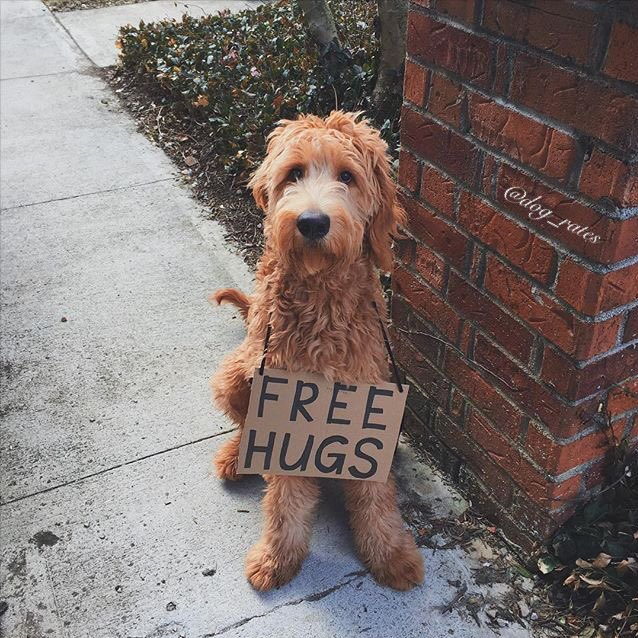

In [261]:
#displaying an image from these jpg_url
print('YES! pleasee!!!')
Image('https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg', width=500, height=300)

In [262]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [263]:
image_predictions.describe

<bound method NDFrame.describe of                 tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p

In [264]:
image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg    2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg    2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg    2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg    2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg    2
                                                  ..
https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg    1
https://pbs.twimg.com/media/CUgb21RXIAAlff7.jpg    1
https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg    1
https://pbs.twimg.com/media/CUixld6WoAArDrJ.jpg    1
https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [265]:
print(f'Number of duplicated Tweets: {int(sum(image_predictions.tweet_id.duplicated()))}')

Number of duplicated Tweets: 0


<a id='assess_api'></a>
### `Additional Data via the Twitter API`

In [266]:
twitter_api_data.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
130,2017-05-23 16:16:06+00:00,867051520902168576,867051520902168576,"Oh my this spooked me up. We only rate dogs, n...",False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 867051512509460480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33420,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1847,2015-12-12 20:57:34+00:00,675781562965868544,675781562965868544,Say hello to Buddah. He was Waldo for Hallowee...,False,"[0, 78]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675781559312506880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1750,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,32467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
486,2016-12-28 16:56:16+00:00,814153002265309185,814153002265309184,This is Oshie. He's ready to party. Bought tha...,False,"[0, 109]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 814152984946876416, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,32000,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
894,2016-07-29 18:53:24+00:00,759099523532779520,759099523532779520,Meet Toby. He has a drinking problem. Inflatab...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 759099516616339456, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,16101,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [267]:
twitter_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [268]:
twitter_api_data.describe

<bound method NDFrame.describe of                     created_at                  id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2349 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2350 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2351 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2352 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2353 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     T

In [269]:
print(f'Number of duplicated Tweets: {int(sum(twitter_api_data.id.duplicated()))}')

Number of duplicated Tweets: 0


<a id='assess_summary'></a>
### `Summery of Assessing`
- #### Enhanced Twitter Archieve <br>
    1. `Tweet_id` is int while it should be of string. <br>
    2. `Timestamp` is string while it should be datetime. <br>
    3. `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` are of float type while they should represent tweets ids of type string. <br>
    4. `Retweeted_status_timestamp` is of type string while it should be datetime. <br>
    5. We only need the original tweets, There're ~ tweets that are replies to original tweets. <br>
    6. Column `name` has invalid data like 'None', 'a', 'an', 'the', 'not', 'all', 'his', 'one', ...  <br>
    7. Columns `doggo`, `floofer`, `puppo`, `pupper` have the same data (<font color=green>tidiness issue</font>). 
<br>
- #### Image Predictions File <br>
    1. `Tweet_id` is int while it should be string. <br>
    2. Columns `p1`, `p2`, `p3` have invalid data like 'stone_wall','laptop', 'cheeseburger', 'web_site', 'electric_fan', 'toilet_tissue', 'pizza'...<br>
    3. Some data in Columns `p1`, `p2`, `p3` have underscores between words. <br>
    4. Data in columns `p1`, `p2`, `p3` are not all capitalized. <br>
    5. More than one entry has the same `jpg_url`. <br>
    6. Less entries means that there're some missing data (2075 out of 2356). <br>
    7. Columns `p1`, `p2`, `p3`, `p1_dog`, `p2_dog`, `p3_dog`,`p1_conf`,`p1_conf`, `p3_conf` have the same data (<font color=green>tidiness issue</font>). <br>

- #### Aditional Data from Twitter API <br>
    1. `id` and `id_str` are of type int while `id_str` should be string as mentioned here: [Twitter IDs](https://developer.twitter.com/en/docs/basics/twitter-ids). <br>
    2. Some ids and id_strs are not the same for the same entry. <br>
    3. Less entries means missing data (2354 out of 2356).   <br>  <br>

- #### <font color=red>The three above dataframes should belong to the same table as they all represent data about tweets </font><font color=green> ( tidiness issue ).</font>



<a id='clean'></a>
<hr>

## Cleaning Data

In the following part, the three following steps are followed in order to clean each issue, these steps are: <br>
`1.` Define <br>
`2.` Code <br>
`3.` Test <br>

<hr>

#### `1` Define
Create a single dataframe by:
1.  create copies of the three dataframes (safer in any case)
2.  change `id` column name in the last dataframe to `tweet_id` to be similar to the other dataframes `tweet_id`
3.  merge all three on tweet_ids and check for any dupliccates

#### `2` Code

In [270]:
#create copies of the dataframes
enhanced_twitter_archieved_copy = enhanced_twitter_archived.copy()
image_predictions_copy = image_predictions.copy()
twitter_api_data_copy = twitter_api_data.copy()

In [271]:
#change the name of the id in the third dataframe to be tweet_id so we can join the three dataframes easily
twitter_api_data_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

In [272]:
#merge all on a single dataframe
from functools import reduce
dfs = [enhanced_twitter_archieved_copy, twitter_api_data_copy]
merged_two_data = reduce(lambda left, right:  pd.merge(left, right, on = ['tweet_id',
                                                                          'in_reply_to_status_id',
                                                                          'in_reply_to_user_id',
                                                                          'source']), dfs)
dfs1 = [merged_two_data, image_predictions_copy]
all_twitter_data_clean = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), dfs1)

#### `3` Test

In [273]:
# print all the column names
print(f'columns:{all_twitter_data_clean.columns.values}')

columns:['tweet_id' 'in_reply_to_status_id' 'in_reply_to_user_id' 'timestamp'
 'source' 'text' 'retweeted_status_id' 'retweeted_status_user_id'
 'retweeted_status_timestamp' 'expanded_urls' 'rating_numerator'
 'rating_denominator' 'name' 'doggo' 'floofer' 'pupper' 'puppo'
 'created_at' 'id_str' 'full_text' 'truncated' 'display_text_range'
 'entities' 'extended_entities' 'in_reply_to_status_id_str'
 'in_reply_to_user_id_str' 'in_reply_to_screen_name' 'user' 'geo'
 'coordinates' 'place' 'contributors' 'is_quote_status' 'retweet_count'
 'favorite_count' 'favorited' 'retweeted' 'possibly_sensitive'
 'possibly_sensitive_appealable' 'lang' 'retweeted_status'
 'quoted_status_id' 'quoted_status_id_str' 'quoted_status' 'jpg_url'
 'img_num' 'p1' 'p1_conf' 'p1_dog' 'p2' 'p2_conf' 'p2_dog' 'p3' 'p3_conf'
 'p3_dog']


In [274]:
# number of entries in the final dataframe
print(f'number of rows: {all_twitter_data_clean.shape[0]}')
print(f'number of duplicates: {sum(all_twitter_data_clean.tweet_id.duplicated())}')

number of rows: 2073
number of duplicates: 0


<hr>

#### `1` Define
Change `tweet_id` column type from int to string

#### `2` Code

In [275]:
#convert the tweet_id column from int to string
all_twitter_data_clean['tweet_id'] = all_twitter_data_clean['tweet_id'].astype(str)

#### `3` Test

In [276]:
#check the type of tweet_id
print(f'type of tweet_id: {all_twitter_data_clean.tweet_id.dtype}')

type of tweet_id: object


<hr>

#### `1`  Define
Change `timestamp` from string to datetime

#### `2` Code

In [277]:
#convert timestamp from string to datetime ==> (('datetime64[ns]') == np.dtype('<M8[ns]'))
all_twitter_data_clean.timestamp = pd.to_datetime(all_twitter_data_clean.timestamp)

#### `3` Test

In [278]:
print(f'type of tiestamp: {all_twitter_data_clean.timestamp.dtype}')

type of tiestamp: datetime64[ns, UTC]


<hr>

#### `1` Define
Keep only original tweets by:
1.  remove all retweets from dataframe.
2.  of those left, only keep the tweets that aren't replies to other tweets.


#### `2` Code

In [279]:
print(f'number of retweets: {len(all_twitter_data_clean[~all_twitter_data_clean.retweeted_status.isna()].index)}')
print(f'number of replies: {len(all_twitter_data_clean[~pd.isna(all_twitter_data_clean.in_reply_to_status_id)])}')

number of retweets: 79
number of replies: 23


In [280]:
#remove those tweets that are retweets
all_twitter_data_clean = (all_twitter_data_clean
                        .drop(all_twitter_data_clean[~all_twitter_data_clean.retweeted_status.isna()].index))

In [281]:
#remove those tweets that are replies to other tweets
all_twitter_data_clean = all_twitter_data_clean[pd.isna(all_twitter_data_clean.in_reply_to_status_id)]

#### `3` Test

In [282]:
#should be 2073 - (23 + 79)
print(f'number of rows: {all_twitter_data_clean.shape[0]}')

number of rows: 1971


<hr>

#### `1` Define
Remove columns that are not in use, by:
1.  keeping the ones that are needed for this project.

#### `2` Code

In [283]:
#keeping only columns needed
all_twitter_data_clean = all_twitter_data_clean[['text','tweet_id', 'name',
                                                   'p1', 'p1_dog', 'p1_conf',
                                                   'p2', 'p2_dog', 'p2_conf',
                                                   'p3', 'p3_dog', 'p3_conf',
                                                   'timestamp', 'rating_numerator',
                                                   'rating_denominator','jpg_url', 'doggo',
                                                   'floofer','puppo','pupper',
                                                   'favorite_count', 'retweet_count']]

#### `3` Test

In [284]:
#check for duplicates
print(f'number of duplicates:{sum(all_twitter_data_clean.tweet_id.duplicated())}')
#check the values of the columns left
print(f'columns left:{all_twitter_data_clean.columns.values}')

number of duplicates:0
columns left:['text' 'tweet_id' 'name' 'p1' 'p1_dog' 'p1_conf' 'p2' 'p2_dog' 'p2_conf'
 'p3' 'p3_dog' 'p3_conf' 'timestamp' 'rating_numerator'
 'rating_denominator' 'jpg_url' 'doggo' 'floofer' 'puppo' 'pupper'
 'favorite_count' 'retweet_count']


<hr>

#### `1` Define
Fix names issues in column `name` by:
1.  remove 'None' names.
2.  remove 'the', 'a', an', 'not', 'all', 'his' and 'one' from names. 

#### `2` Code

In [285]:
#check how many names are "None"
print(f'number of "None" names: {len(all_twitter_data_clean.loc[all_twitter_data_clean["name"] == "None"])}')

number of "None" names: 524


In [286]:
print(all_twitter_data_clean.loc[all_twitter_data_clean["name"] == "the"].text.unique())

['Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx'
 "This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn"
 "This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb"
 "This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF"
 "This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU"
 'This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK'
 "Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p"]


In [287]:
print(all_twitter_data_clean.loc[all_twitter_data_clean["name"] == "this"].text.unique())

['Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv']


In [288]:
print(all_twitter_data_clean.loc[all_twitter_data_clean["name"] == "all"].text.unique())

['This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh']


In [289]:
print(all_twitter_data_clean.loc[all_twitter_data_clean["name"] == "not"].text.unique())

['What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX']


In [290]:
print(all_twitter_data_clean.loc[all_twitter_data_clean["name"] == "his"].text.unique())

['That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7']


Note: we can change the name of this one to **Quizno**

In [291]:
#change this naem to Quizno
all_twitter_data_clean.name.replace({"his": "Quizno"},inplace=True)
print(all_twitter_data_clean.loc[all_twitter_data_clean["name"] == "his"].text.unique())

[]


In [292]:
print(all_twitter_data_clean.loc[all_twitter_data_clean["name"] == "one"].text.unique())

["Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"
 "This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k"
 "This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd"
 'This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd']


Note: we can change the name of the first one to **Grace**

In [293]:
all_twitter_data_clean.name.replace({'one': 'Grace'}, inplace=True)
print(all_twitter_data_clean.loc[all_twitter_data_clean["name"] == "one"].text.unique())

[]


In [294]:
#change all "the", "his", "all", "not", "this", "one" to None as we couldn't find names
all_twitter_data_clean["name"].replace({"the": "None",
                                       "his": "None",
                                        "all": "None",
                                        "not": "None",
                                        "this":"None",
                                        "one":"None"}, inplace=True)

In [295]:
#should be 524 + 10
len(all_twitter_data_clean.loc[all_twitter_data_clean["name"] == "None"])

534

In [296]:
all_twitter_data_clean.loc[all_twitter_data_clean.text.str.contains("named")]

,text,tweet_id,name,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,...,timestamp,rating_numerator,rating_denominator,jpg_url,doggo,floofer,puppo,pupper,favorite_count,retweet_count
1580,This is a Sizzlin Menorah spaniel from Brookly...,675706639471788032,a,English_springer,True,0.990300,Welsh_springer_spaniel,True,0.002080,cocker_spaniel,...,2015-12-12 15:59:51+00:00,10,10,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,None,None,None,None,693,106
1677,This is a Lofted Aphrodisiac Terrier named Kip...,673636718965334016,a,wombat,False,0.880257,corn,False,0.019421,pug,...,2015-12-06 22:54:44+00:00,10,10,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,None,None,None,None,1194,404
1756,This is a Tuscaloosa Alcatraz named Jacob (Yac...,671743150407421952,a,toy_poodle,True,0.419427,miniature_poodle,True,0.237067,swing,...,2015-12-01 17:30:22+00:00,11,10,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,None,None,None,None,779,248
1787,This is a Helvetica Listerine named Rufus. Thi...,671147085991960577,a,Yorkshire_terrier,True,0.467202,cairn,True,0.440122,silky_terrier,...,2015-11-30 02:01:49+00:00,9,10,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,None,None,None,None,713,254
1837,This is a Deciduous Trimester mix named Spork....,670427002554466305,a,seat_belt,False,0.952258,toy_terrier,True,0.038872,beagle,...,2015-11-28 02:20:27+00:00,9,10,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,None,None,None,None,551,179
1846,This is a Rich Mahogany Seltzer named Cherokee...,670361874861563904,a,platypus,False,0.974075,spotted_salamander,False,0.011068,bison,...,2015-11-27 22:01:40+00:00,9,10,https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg,None,None,None,None,344,71
1849,This is a Speckled Cauliflower Yosemite named ...,670303360680108032,a,Shetland_sheepdog,True,0.380278,Cardigan,True,0.342806,guinea_pig,...,2015-11-27 18:09:09+00:00,9,10,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,None,None,None,None,452,151
1867,This is a spotted Lipitor Rumpelstiltskin name...,669923323644657664,a,car_mirror,False,0.343063,seat_belt,False,0.110289,wing,...,2015-11-26 16:59:01+00:00,10,10,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,None,None,None,None,250,64
1881,This is a Coriander Baton Rouge named Alfredo....,669564461267722241,a,toy_poodle,True,0.623685,miniature_poodle,True,0.259920,standard_poodle,...,2015-11-25 17:13:02+00:00,10,10,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,None,None,None,None,413,133
1886,Here we have a Gingivitis Pumpernickel named Z...,669363888236994561,None,golden_retriever,True,0.539004,Irish_setter,True,0.406550,cocker_spaniel,...,2015-11-25 03:56:01+00:00,10,10,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,None,None,None,None,669,252


In [297]:
#fix all names that has "named" in text column 
for i in all_twitter_data_clean.loc[all_twitter_data_clean.text.str.contains("named")].index:
    all_twitter_data_clean.at[i,'name'] = all_twitter_data_clean.loc[i].text.partition("named")[2].split(".")[0].lstrip()

In [298]:
all_twitter_data_clean.loc[all_twitter_data_clean.text.str.contains("named")]

,text,tweet_id,name,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,...,timestamp,rating_numerator,rating_denominator,jpg_url,doggo,floofer,puppo,pupper,favorite_count,retweet_count
1580,This is a Sizzlin Menorah spaniel from Brookly...,675706639471788032,Wylie,English_springer,True,0.990300,Welsh_springer_spaniel,True,0.002080,cocker_spaniel,...,2015-12-12 15:59:51+00:00,10,10,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,None,None,None,None,693,106
1677,This is a Lofted Aphrodisiac Terrier named Kip...,673636718965334016,Kip,wombat,False,0.880257,corn,False,0.019421,pug,...,2015-12-06 22:54:44+00:00,10,10,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,None,None,None,None,1194,404
1756,This is a Tuscaloosa Alcatraz named Jacob (Yac...,671743150407421952,Jacob (Yacōb),toy_poodle,True,0.419427,miniature_poodle,True,0.237067,swing,...,2015-12-01 17:30:22+00:00,11,10,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,None,None,None,None,779,248
1787,This is a Helvetica Listerine named Rufus. Thi...,671147085991960577,Rufus,Yorkshire_terrier,True,0.467202,cairn,True,0.440122,silky_terrier,...,2015-11-30 02:01:49+00:00,9,10,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,None,None,None,None,713,254
1837,This is a Deciduous Trimester mix named Spork....,670427002554466305,Spork,seat_belt,False,0.952258,toy_terrier,True,0.038872,beagle,...,2015-11-28 02:20:27+00:00,9,10,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,None,None,None,None,551,179
1846,This is a Rich Mahogany Seltzer named Cherokee...,670361874861563904,Cherokee,platypus,False,0.974075,spotted_salamander,False,0.011068,bison,...,2015-11-27 22:01:40+00:00,9,10,https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg,None,None,None,None,344,71
1849,This is a Speckled Cauliflower Yosemite named ...,670303360680108032,Hemry,Shetland_sheepdog,True,0.380278,Cardigan,True,0.342806,guinea_pig,...,2015-11-27 18:09:09+00:00,9,10,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,None,None,None,None,452,151
1867,This is a spotted Lipitor Rumpelstiltskin name...,669923323644657664,Alphred,car_mirror,False,0.343063,seat_belt,False,0.110289,wing,...,2015-11-26 16:59:01+00:00,10,10,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,None,None,None,None,250,64
1881,This is a Coriander Baton Rouge named Alfredo....,669564461267722241,Alfredo,toy_poodle,True,0.623685,miniature_poodle,True,0.259920,standard_poodle,...,2015-11-25 17:13:02+00:00,10,10,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,None,None,None,None,413,133
1886,Here we have a Gingivitis Pumpernickel named Z...,669363888236994561,Zeus,golden_retriever,True,0.539004,Irish_setter,True,0.406550,cocker_spaniel,...,2015-11-25 03:56:01+00:00,10,10,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,None,None,None,None,669,252


In [299]:
all_twitter_data_clean.loc[all_twitter_data_clean.text.str.contains("name is")]

,text,tweet_id,name,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,...,timestamp,rating_numerator,rating_denominator,jpg_url,doggo,floofer,puppo,pupper,favorite_count,retweet_count
140,Sorry for the lack of posts today. I came home...,859607811541651456,None,golden_retriever,True,0.895529,Irish_setter,True,0.024099,Labrador_retriever,...,2017-05-03 03:17:27+00:00,13,10,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,None,None,puppo,None,19476,1704
690,This is my dog. Her name is Zoey. She knows I'...,765395769549590528,my,Pembroke,True,0.509491,Cardigan,True,0.330401,Shetland_sheepdog,...,2016-08-16 03:52:26+00:00,13,10,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,None,None,None,None,20539,3127
1419,We normally don't rate bears but this one seem...,682047327939461121,None,teddy,False,0.364095,doormat,False,0.119243,toyshop,...,2015-12-30 03:55:29+00:00,10,10,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,None,None,None,None,3525,1088
1472,This pup's name is Sabertooth (parents must be...,679736210798047232,None,French_bulldog,True,0.319139,Chihuahua,True,0.154088,Cardigan,...,2015-12-23 18:51:56+00:00,9,10,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,None,None,None,None,2311,918
1985,Another topnotch dog. His name is Big Jumpy Ra...,667524857454854144,None,hare,False,0.447893,dhole,False,0.092435,Chesapeake_Bay_retriever,...,2015-11-20 02:08:22+00:00,12,10,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,None,None,None,None,1798,1198
2005,This is a Dasani Kingfisher from Maine. His na...,667177989038297088,a,vizsla,True,0.259249,Chesapeake_Bay_retriever,True,0.176293,Weimaraner,...,2015-11-19 03:10:02+00:00,8,10,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,None,None,None,None,200,58
2030,This is Lugan. He is a Bohemian Rhapsody. Very...,666739327293083650,Lugan,miniature_poodle,True,0.546933,cocker_spaniel,True,0.165255,toy_poodle,...,2015-11-17 22:06:57+00:00,10,10,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,None,None,None,None,244,71


In [300]:
for i in all_twitter_data_clean.loc[all_twitter_data_clean.text.str.contains("name is")].index:
    all_twitter_data_clean.at[i,'name'] = all_twitter_data_clean.loc[i].text.partition("name is")[2].split(".")[0].lstrip()

In [301]:
all_twitter_data_clean.loc[all_twitter_data_clean.text.str.contains("name is")]

,text,tweet_id,name,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,...,timestamp,rating_numerator,rating_denominator,jpg_url,doggo,floofer,puppo,pupper,favorite_count,retweet_count
140,Sorry for the lack of posts today. I came home...,859607811541651456,Zoey and she's 13/10 https://t,golden_retriever,True,0.895529,Irish_setter,True,0.024099,Labrador_retriever,...,2017-05-03 03:17:27+00:00,13,10,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,None,None,puppo,None,19476,1704
690,This is my dog. Her name is Zoey. She knows I'...,765395769549590528,Zoey,Pembroke,True,0.509491,Cardigan,True,0.330401,Shetland_sheepdog,...,2016-08-16 03:52:26+00:00,13,10,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,None,None,None,None,20539,3127
1419,We normally don't rate bears but this one seem...,682047327939461121,Thea,teddy,False,0.364095,doormat,False,0.119243,toyshop,...,2015-12-30 03:55:29+00:00,10,10,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,None,None,None,None,3525,1088
1472,This pup's name is Sabertooth (parents must be...,679736210798047232,Sabertooth (parents must be cool),French_bulldog,True,0.319139,Chihuahua,True,0.154088,Cardigan,...,2015-12-23 18:51:56+00:00,9,10,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,None,None,None,None,2311,918
1985,Another topnotch dog. His name is Big Jumpy Ra...,667524857454854144,Big Jumpy Rat,hare,False,0.447893,dhole,False,0.092435,Chesapeake_Bay_retriever,...,2015-11-20 02:08:22+00:00,12,10,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,None,None,None,None,1798,1198
2005,This is a Dasani Kingfisher from Maine. His na...,667177989038297088,Daryl,vizsla,True,0.259249,Chesapeake_Bay_retriever,True,0.176293,Weimaraner,...,2015-11-19 03:10:02+00:00,8,10,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,None,None,None,None,200,58
2030,This is Lugan. He is a Bohemian Rhapsody. Very...,666739327293083650,Rocky,miniature_poodle,True,0.546933,cocker_spaniel,True,0.165255,toy_poodle,...,2015-11-17 22:06:57+00:00,10,10,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,None,None,None,None,244,71


In [302]:
all_twitter_data_clean.at[140, "name"] = "Zoey"

In [303]:
#fix zoey's name
len(all_twitter_data_clean.loc[all_twitter_data_clean.name == "Zoey and she's 13/10 https://t"])

0

In [304]:
all_twitter_data_clean.at[1472, "name"] = "Sabertooth"

In [305]:
len(all_twitter_data_clean.loc[all_twitter_data_clean.name == "Sabertooth (parents must be cool)"])

0

In [306]:
print(f'number of names of length <=2: {len(all_twitter_data_clean.loc[all_twitter_data_clean.name.str.len()<=2])}')

number of names of length <=2: 53


In [307]:
condition = ((all_twitter_data_clean.name == "Mo") | 
            (all_twitter_data_clean.name == "Bo") | 
            (all_twitter_data_clean.name == "Jo") |
            (all_twitter_data_clean.name == "Ed"))
            
print(f'number of names that length<=2 and in (Mo, Bo, Jo, Ed): {len(all_twitter_data_clean.loc[(all_twitter_data_clean.name.str.len()==2) & (condition)])}')

number of names that length<=2 and in (Mo, Bo, Jo, Ed): 9


In [308]:
for i in all_twitter_data_clean.loc[(all_twitter_data_clean.name.str.len()<=2) &
                          ~(condition)].index:
    all_twitter_data_clean.at[i, 'name'] ="None"

In [309]:
print(f'number of names that length<=2 and not in (Mo, Bo, Jo, Ed): {len(all_twitter_data_clean.loc[(all_twitter_data_clean.name.str.len()==2) & (~condition)])}')

number of names that length<=2 and not in (Mo, Bo, Jo, Ed): 0


In [310]:
#replace none with nan names
all_twitter_data_clean['name'].replace({"None":np.nan},inplace=True)

#### `3` Test

In [311]:
print(f'duplicated names: { sum(all_twitter_data_clean.duplicated())}')

duplicated names: 0


In [312]:
print(f'unique names:{all_twitter_data_clean.name.unique()}')

unique names:['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' nan 'Jax' 'Zoey' 'Cassie'
 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus' 'Gerald'
 'Jeffrey' 'such' 'Canela' 'Maya' 'Mingus' 'Derek' 'Roscoe' 'Waffles'
 'Jimbo' 'Maisey' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah' 'Bella' 'Grizzwald'
 'Rusty' 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary' 'Elliot' 'Louis'
 'Jesse' 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Steven' 'Beau' 'Snoopy'
 'Shadow' 'Emmy' 'Aja' 'Penny' 'Dante' 'Nelly' 'Ginger' 'Benedict' 'Venti'
 'Goose' 'Nugget' 'Cash' 'Jed' 'Sebastian' 'Sierra' 'Monkey' 'Harry'
 'Kody' 'Lassie' 'Rover' 'Napolean' 'Boomer' 'Cody' 'Rumble' 'Clifford'
 'Dewey' 'Scout' 'Gizmo' 'Walter' 'Cooper' 'Harold' 'Shikha' 'Lili'
 'Jamesy' 'Coco' 'Sammy' 'Meatball' 'Paisley' 'Albus' 'Neptune' 'Belle'
 'Quinn' 'Zooey' 'Dave' 'Jersey' 'Hobbes' 'Burt' 'Lorenzo' 'Carl' 'Jordy'
 'Milky' 'Trooper' 'quite' 'Sophie' 'Wyatt' 'Rosie' 'Thor' 'Oscar'
 'Callie' 'Cermet' 'Marlee' 'Arya' 'Einstein' 'Alice' 'Rumpole' 

<hr>

#### `1` Define
Create one column for dog_stages, by:
1.  using columns `doggo`, `floofer`, `puppo`, `pupper` that have the same data.
2.  using melt dunction to keep only the columns that I want + creating two columns for var_name and value_name.
3.  extract some other dog breeds from the `text` column.
4.  combine the results from step 2 and 3 above.
3.  drop the columns that are not in use.

#### `2`Code

In [313]:
all_twitter_data_clean['dog_stage1'] = all_twitter_data_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [314]:
print(f'dog stages: \n{all_twitter_data_clean.dog_stage1.value_counts()}')


dog stages: 
pupper     220
doggo       71
puppo       28
floofer      3
Name: dog_stage1, dtype: int64


In [315]:
#use melt to combine 'doggo', 'floofer', 'puppo', 'pupper'
all_twitter_data_clean = pd.melt(all_twitter_data_clean, id_vars=['name', 'text', 'tweet_id',
                                                                'timestamp', 'rating_numerator',
                                                                'rating_denominator', 'jpg_url',
                                                                'p1', 'p1_dog', 'p1_conf',
                                                                'p2', 'p2_dog', 'p2_conf',
                                                                'p3', 'p3_dog', 'p3_conf',
                                                                'favorite_count', 'retweet_count','dog_stage1'],
                               var_name='to_be_dropped', value_name='dog_stage')

#drop var_name column as it won't be in use
all_twitter_data_clean = all_twitter_data_clean.drop('to_be_dropped', 1)

#drop duplicates
all_twitter_data_clean = all_twitter_data_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

In [316]:
all_twitter_data_clean['dog_stage'].replace({"None":np.nan},inplace=True)

In [317]:
take_not_null = lambda s1,s2: s2 if pd.isna(s1) else s1

In [318]:
all_twitter_data_clean['dog_stage2']= all_twitter_data_clean['dog_stage'].combine(all_twitter_data_clean['dog_stage1'],take_not_null )

In [319]:
#drop columns that are not in use
all_twitter_data_clean = all_twitter_data_clean.drop('dog_stage', 1)
all_twitter_data_clean = all_twitter_data_clean.drop('dog_stage1', 1)


In [320]:
all_twitter_data_clean.rename(columns={'dog_stage2':'dog_stage'},inplace=True)

#### `3`Test

In [321]:
#check for any duplicates
print(f'number of duplicates: {sum(all_twitter_data_clean.tweet_id.duplicated())}\n')
#check for columns left
print(f'columns left: {all_twitter_data_clean.columns.values}\n')
#check dog stage values
print(f'dog stages: \n{all_twitter_data_clean.dog_stage.value_counts()}')


number of duplicates: 0

columns left: ['name' 'text' 'tweet_id' 'timestamp' 'rating_numerator'
 'rating_denominator' 'jpg_url' 'p1' 'p1_dog' 'p1_conf' 'p2' 'p2_dog'
 'p2_conf' 'p3' 'p3_dog' 'p3_conf' 'favorite_count' 'retweet_count'
 'dog_stage']

dog stages: 
pupper     231
doggo       69
puppo       28
floofer      8
Name: dog_stage, dtype: int64


<hr>

#### Define
Create two columns one for `dog_breed` and one for the confidence level of the dog_breed `dog_conf`, by:
1.  use the data in `p1_dog`, `p2_dog`, `p3_dog` columns to discovre if this entry is actually a dog, or not.
2.  use the data in `p1`, `p2`, `p3` columns to discovre the breed of the dog.
3.  drop the columns that are no longer in use after this process.
4.  fix underscores and capitalize the dogs breeds.

#### `2` Code

In [322]:
#create a function to fetch the data from p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf ,p3_conf
#store the results in wo lists one for breed and one for the confidence level that this pic is for a dog of this breed
#apply the function to our dataframe
dog_breed = []
dog_conf = []
def dog_breed_and_conf(all_twitter_data_clean):
    if all_twitter_data_clean['p1_dog'] == True:
        dog_breed.append(all_twitter_data_clean['p1'])
        dog_conf.append(all_twitter_data_clean['p1_conf'])
    elif all_twitter_data_clean['p2_dog'] == True:
        dog_breed.append(all_twitter_data_clean['p2'])
        dog_conf.append(all_twitter_data_clean['p2_conf'])
    elif all_twitter_data_clean['p3_dog'] == True:
        dog_breed.append(all_twitter_data_clean['p3'])
        dog_conf.append(all_twitter_data_clean['p3_conf'])
    else:
        dog_breed.append("None")
        dog_conf.append(0.0)
        
all_twitter_data_clean.apply(dog_breed_and_conf, axis=1);

In [323]:
#create two columns from the resuted two lists
all_twitter_data_clean['dog_breed'] = dog_breed
all_twitter_data_clean['dog_conf'] = dog_conf

In [324]:
#drop the columns p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf ,p3_conf as they're no longer needed
all_twitter_data_clean = all_twitter_data_clean.drop(columns=['p1', 'p1_dog', 'p1_conf',
                                                              'p2', 'p2_dog', 'p2_conf',
                                                              'p3', 'p3_dog', 'p3_conf'], axis=1)

In [325]:
#replce underscores in the dog_breed column with space
all_twitter_data_clean.dog_breed = all_twitter_data_clean.dog_breed.str.replace('_',' ')

In [326]:
#capitalize the dog breeds
all_twitter_data_clean.dog_breed = all_twitter_data_clean.dog_breed.str.capitalize()

In [327]:
#replce underscores in the dog_breed column with space 
all_twitter_data_clean['dog_breed'].replace({"None":np.nan},inplace=True)

#### `3` Test

In [328]:
#check the data after this process
print(f'dog breeds:{all_twitter_data_clean.dog_breed.unique()}')

dog breeds:['Miniature pinscher' 'Italian greyhound' nan 'English setter'
 'Miniature schnauzer' 'Maltese dog' 'Airedale' 'Rottweiler'
 'Golden retriever' 'Chesapeake bay retriever' 'Chihuahua' 'Pembroke'
 'West highland white terrier' 'Toy poodle' 'Giant schnauzer'
 'Soft-coated wheaten terrier' 'Vizsla' 'Miniature poodle'
 'Labrador retriever' 'German shepherd' 'Border collie' 'Pug' 'Bloodhound'
 'Lhasa' 'Newfoundland' 'Malamute' 'Black-and-tan coonhound' 'Toy terrier'
 'Blenheim spaniel' 'Irish terrier' 'Curly-coated retriever' 'Dalmatian'
 'Ibizan hound' 'Siberian husky' 'Pomeranian' 'Norwegian elkhound' 'Boxer'
 'Flat-coated retriever' 'Papillon' 'Saint bernard' 'Tibetan terrier'
 'Borzoi' 'Yorkshire terrier' 'Kuvasz' 'Beagle' 'Walker hound'
 'Gordon setter' 'Cardigan' 'Cocker spaniel'
 'American staffordshire terrier' 'Scotch terrier' 'Eskimo dog' 'Collie'
 'Old english sheepdog' 'Standard poodle' 'Samoyed' 'Malinois'
 'Tibetan mastiff' 'Shih-tzu' 'Boston bull' 'English springer'

<hr>

#### `1` Define

Craete a new column for `dog_rate`, by:
1.  change `rating denominator` and `rating numerator` from strings to floats.
2.  devide numerator on denominator to create a rate.
3.  drop `rating_numerator` and `rating_denominator` as they are no longer used.
4.  find solution to work around super weird data in the resulted `dog_rate`.

In [329]:
#change the types of rating_numerator and rating_denominator from string to float
all_twitter_data_clean.rating_denominator = all_twitter_data_clean.rating_denominator\
                                            .replace('None',np.nan).astype(float)
all_twitter_data_clean.rating_numerator = all_twitter_data_clean.rating_numerator \
                                            .replace('None',np.nan).astype(float)

In [330]:
print(f'type of numerator:{ all_twitter_data_clean.rating_numerator.dtype}')
print(f'type of numerator:{ all_twitter_data_clean.rating_denominator.dtype}')

type of numerator:float64
type of numerator:float64


In [331]:
#devide rating_numerator on rating_denominator
all_twitter_data_clean['dog_rate'] = \
all_twitter_data_clean.rating_numerator / all_twitter_data_clean.rating_denominator

In [332]:
#drop rating_numerator and rating_denominator as they are no longer used
all_twitter_data_clean = all_twitter_data_clean.drop(columns=['rating_numerator', 'rating_denominator'])

In [333]:
#### `3` Test

In [334]:
#check the resulted data
print(f'dog rates:{all_twitter_data_clean.dog_rate.value_counts().index}')

dog rates:Float64Index([               1.2,                1.0,                1.1,
                             1.3,                0.9,                0.8,
                             0.7,                0.5,                1.4,
                             0.6,                0.3,                0.4,
                             0.2,                0.1,              177.6,
                             2.6, 3.4285714285714284, 0.6363636363636364,
              0.8181818181818182,                0.0,                7.5,
                            42.0,                2.7],
             dtype='float64')


Note: I argue that **177.6**, and **42.0** are extreme values so let's check what are these exactly??

In [335]:
all_twitter_data_clean.loc[all_twitter_data_clean['dog_rate']== 42.000000]

,name,text,tweet_id,timestamp,jpg_url,favorite_count,retweet_count,dog_stage,dog_breed,dog_conf,dog_rate
3667,NaN,After so many requests... here you go.\n\nGood...,670842764863651840,2015-11-29 05:52:33+00:00,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,7989,4324,NaN,NaN,0.0,42.0


This is not a dog rate, it's just Snoop Dogg picture LOL🤣!!


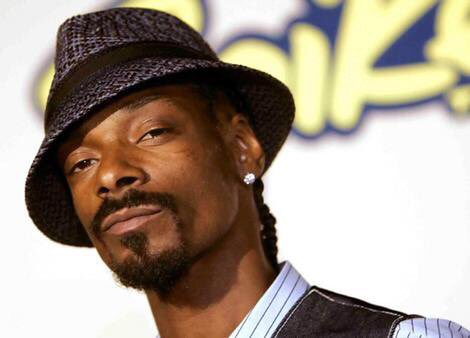

In [336]:
print('This is not a dog rate, it\'s just\033[1m Snoop Dogg\033[0m picture LOL🤣!!')
#Here's the proof
Image('https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg')

In [337]:
#remove Snoop Dogg picture "Sorry Snoopies!:("
all_twitter_data_clean = all_twitter_data_clean.drop(
    all_twitter_data_clean[ all_twitter_data_clean['tweet_id'] == '670842764863651840'].index)

In [338]:
all_twitter_data_clean.loc[all_twitter_data_clean['dog_rate']== 177.6]

,name,text,tweet_id,timestamp,jpg_url,favorite_count,retweet_count,dog_stage,dog_breed,dog_conf,dog_rate
2693,Atticus,This is Atticus. He's quite simply America af....,749981277374128128,2016-07-04 15:00:45+00:00,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,5569,2772,NaN,NaN,0.0,177.6


Oww! How cuute! This's definetly a keeper!! (but we are now at least aware of this outlier)


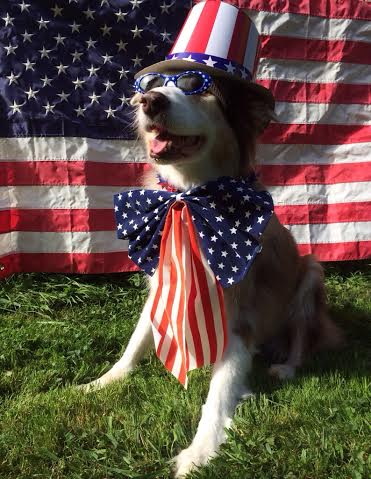

In [339]:
print("Oww! How cuute! \033[1mThis\'s definetly a keeper!!\033[0m (but we are now at least aware of this outlier)")
Image('https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

In [340]:
#check the resulted data
print(f'dog rates:{all_twitter_data_clean.dog_rate.value_counts().index}')

dog rates:Float64Index([               1.2,                1.0,                1.1,
                             1.3,                0.9,                0.8,
                             0.7,                0.5,                1.4,
                             0.6,                0.3,                0.4,
                             0.2,                0.1,              177.6,
                             2.6, 3.4285714285714284, 0.6363636363636364,
              0.8181818181818182,                0.0,                7.5,
                             2.7],
             dtype='float64')


In [341]:
all_twitter_data_clean

,name,text,tweet_id,timestamp,jpg_url,favorite_count,retweet_count,dog_stage,dog_breed,dog_conf,dog_rate
1927,Josep,This is Josep. He is a Rye Manganese mix. Can ...,666776908487630848,2015-11-18 00:36:17+00:00,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,368,186,NaN,Miniature pinscher,0.167175,0.5
1926,Octaviath,This is a purebred Bacardi named Octaviath. Ca...,666781792255496192,2015-11-18 00:55:42+00:00,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,404,211,NaN,Italian greyhound,0.618316,1.0
1925,NaN,Unfamiliar with this breed. Ears pointy af. Wo...,666786068205871104,2015-11-18 01:12:41+00:00,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,800,521,NaN,NaN,0.000000,0.2
1924,Jockson,This is Jockson. He is a Pinnacle Sagittarius....,666804364988780544,2015-11-18 02:25:23+00:00,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,250,95,NaN,English setter,0.328792,0.8
1923,Jeph,This is Jeph. He is a German Boston Shuttlecoc...,666817836334096384,2015-11-18 03:18:55+00:00,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,540,267,NaN,Miniature schnauzer,0.496953,0.9
...,...,...,...,...,...,...,...,...,...,...,...
4749,Bayley,This is Bayley. She fell asleep trying to esca...,738537504001953792,2016-06-03 01:07:16+00:00,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,5575,1759,puppo,Chow,0.808737,1.1
3954,NaN,Here's a puppo that seems to be on the fence a...,889665388333682689,2017-07-25 01:55:32+00:00,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,38818,8538,puppo,Pembroke,0.966327,1.3
3956,Stuart,This is Stuart. He's sporting his favorite fan...,889531135344209921,2017-07-24 17:02:04+00:00,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,15359,2321,puppo,Golden retriever,0.953442,1.3
4404,Lily,Say hello to Lily. She's pupset that her costu...,793195938047070209,2016-10-31 21:00:23+00:00,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,17063,6547,puppo,Labrador retriever,0.654762,1.2


<a id='store'></a>
<hr>

## Storing Data
Storing clean data into csv file called: `twitter_archive_master.csv`

In [342]:
#rearrange columns
#sorting the rows by timestamp
#store dataframe into twitter_archive_master.csv
all_twitter_data_clean = all_twitter_data_clean[['timestamp','tweet_id', 'name', 'dog_rate', 'dog_stage', 'dog_breed', 'retweet_count', 'favorite_count', 'jpg_url', 'dog_conf' ]]
all_twitter_data_clean.sort_values(by=['timestamp'], inplace=True, ascending=False)
all_twitter_data_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='Visual'></a>
<hr>

## Analyzing and Visualizing

#### `1` Which dog stages are most liked?

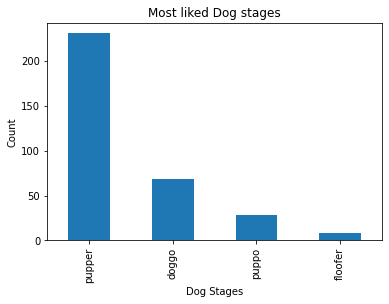

In [343]:
all_twitter_data_clean['dog_stage'].value_counts().plot(kind = 'bar')
plt.title('Most liked Dog stages')
plt.xlabel('Dog Stages')
plt.ylabel('Count');

<hr>

#### `2` Which dog breeds are most liked?

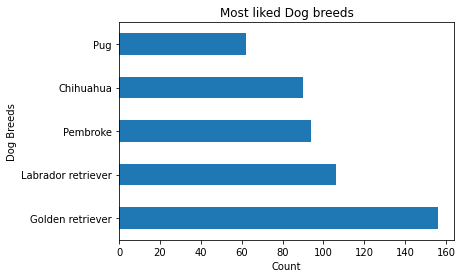

In [344]:
all_twitter_data_clean['dog_breed'].value_counts()[:5].plot(kind = 'barh')
plt.title('Most liked Dog breeds')
plt.xlabel('Count')
plt.ylabel('Dog Breeds');

<hr>

#### `3` Which dog names are most popular?

most popular dogs names:
Charlie    11
Cooper     10
Lucy       10
Oliver     10
Penny       9
Name: name, dtype: int64


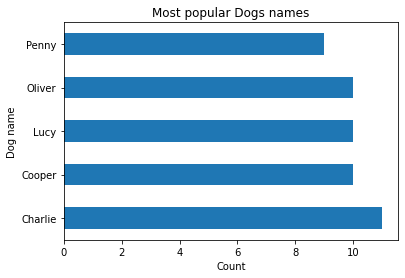

In [345]:
all_twitter_data_clean['name'].value_counts()[:5].plot(kind = 'barh')
plt.title('Most popular Dogs names')
plt.xlabel('Count')
plt.ylabel('Dog name');
print(f'most popular dogs names:\n{all_twitter_data_clean.name.value_counts().head(5)}')

<hr>

#### `4` What is the total number of tweets' retweets over the time?

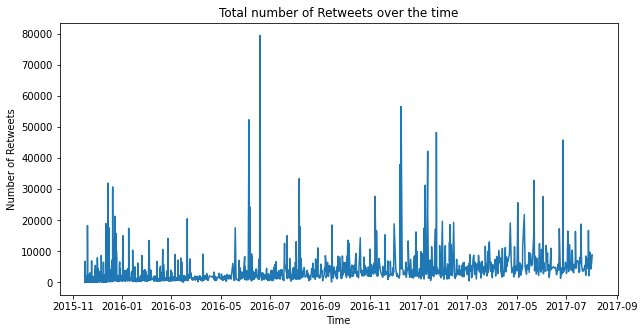

In [346]:
sb.set_context()
plt.subplots(figsize=(10, 5))
plt.title('Total number of Retweets over the time')
plt.xlabel('Time')
plt.ylabel('Number of Retweets');
plt.plot(all_twitter_data_clean.timestamp, all_twitter_data_clean.retweet_count);

<hr>

#### `5` What is the total number of tweets' favorites over the time?

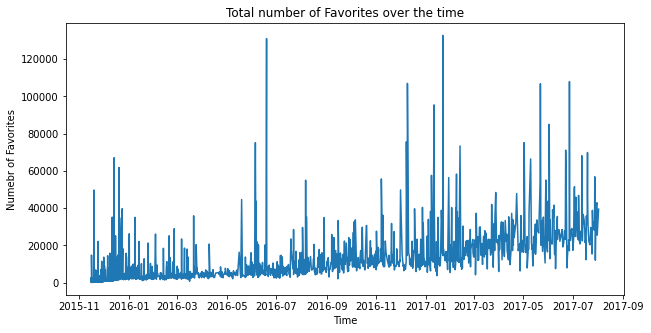

In [347]:
sb.set_context()
plt.subplots(figsize=(10, 5))
plt.title('Total number of Favorites over the time')
plt.xlabel('Time')
plt.ylabel('Numebr of Favorites');
plt.plot(all_twitter_data_clean.timestamp, all_twitter_data_clean.favorite_count);

<hr>

#### `6` Which dog has received the highest retweets count?

In [348]:
index_most_rt = all_twitter_data_clean.loc[all_twitter_data_clean.retweet_count ==
                                   all_twitter_data_clean.retweet_count.max()].index

In [349]:
print('This doggo Labrador retriever has received the highest retweets of all! Cuute AF isn\'t?? 🥺')
Image(url = all_twitter_data_clean.loc[index_most_rt]['jpg_url'].unique()[0], width=200, height=300)

This doggo Labrador retriever has received the highest retweets of all! Cuute AF isn't?? 🥺


<hr>

#### `7` Which dog has received the highest favorites count?

In [350]:
index_most_fav = all_twitter_data_clean.loc[all_twitter_data_clean.favorite_count == 
                                            all_twitter_data_clean.favorite_count.max()].index

In [351]:
print('This puppo Lakeland terrier has received the highest favorites of all tweets!')
Image(url = all_twitter_data_clean.loc[index_most_fav]['jpg_url'].unique()[0], width=200, height=300)

This puppo Lakeland terrier has received the highest favorites of all tweets!
